Fish population: 0
Bear population: 98


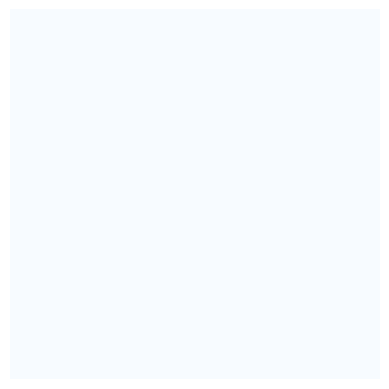

Type 'g' to generate new environment, 'w' to make creatures walk randomly, 'q' to quit:  q


In [2]:
#from abc import ABCMeta, abstractmethod
import matplotlib.pyplot as plot
import random


class Creature():
    def __init__(self, species):
        self.pos_x = 0
        self.pos_y = 0
        self.old_pos_x = 0
        self.old_pos_y = 0
        self.species = species
        
    def randomSpawn(self, size):
        self.pos_x = random.randrange(0, size)
        self.pos_y = random.randrange(0, size)
        
    def spawn(self, x, y):
        self.pos_x = x
        self.pos_y = y
        
    def randomWalk(self, size):
        y = random.choice([-1, 0, 1])
        x = random.choice([-1, 0, 1])
        
        self.old_pos_x = self.pos_x
        self.old_pos_y = self.pos_y
        
        if (self.old_pos_x + x) < 0:
            x = random.choice([0, 1])
        elif (self.old_pos_x + x) > size - 1:
            x = random.choice([0, -1])
            
        if (self.old_pos_y + y) < 0:
            y = random.choice([0, 1])
        elif (self.old_pos_y + y) > size - 1:
            y = random.choice([0, -1])
            
        self.pos_x = self.old_pos_x + x
        self.pos_y = self.old_pos_y + y
        
    def notExist(self):
        self.species = -1
    
    def getSpecies(self):
        return self.species
        
    def getPosition(self):
        position = [self.pos_x, self.pos_y]
        return position
    
    def getPosX(self):
        return self.pos_x
    
    def getPosY(self):
        return self.pos_y
    
    def getOldPosX(self):
        return self.old_pos_x
    
    def getOldPosY(self):
        return self.old_pos_y
        
        
# Creature class end 
# ---------------------------------------------------------------- 


class Environment():
    
    def __init__(self, size):
        # initialize the ecosystem 
        self.ENV = []
        self.size = size

        # setting up empty environment 
        for i in range(0, self.size):
            self.ENV.append([0]*(self.size))
            
    def generateRiver(self, river_col):
        
        for i in range(0, self.size):
            if (river_col - 1) < 0:
                river_col = 1
            if (river_col + 1) > self.size - 1:
                river_col = self.size - 2
            
            self.ENV[i][river_col - 1] = round(random.uniform(0.9, 1.1), 1)
            self.ENV[i][river_col] = round(random.uniform(0.9, 1.1), 1)
            self.ENV[i][river_col + 1] = round(random.uniform(0.9, 1.1), 1)
            
            r_curve = random.choice([-1, 0, 1])
            river_col += r_curve
    
    # legacy 
    def generateBears(self, rarity = 64):
        bear = 3
        for i in range(0, self.size):
            for j in range(0, self.size):
                spawnlist = [True] + [False]*rarity
                spawn = random.choice(spawnlist)
                if (self.ENV[i][j] == 0) & spawn:
                    self.ENV[i][j] = bear
    
    # legacy
    def generateFish(self, rarity = 4):
        fish = 2
        for i in range(0, self.size):
            for j in range(0, self.size):
                spawnlist = [True] + [False]*rarity
                spawn = random.choice(spawnlist)
                if (0.9 <= self.ENV[i][j] <= 1.1) & spawn:
                    self.ENV[i][j] = fish
                    
    def getSize(self):
        return self.size
    
    def editPositionValue(self, row, column, variable):
        self.ENV[row][column] = variable
        
    def getPositionValue(self, row, column):
        return self.ENV[row][column]
            
    def showEnvironment(self):
        fig = plot.figure(frameon=False)
        im = plot.imshow(self.ENV, cmap='Blues')
        
        plot.axis('off')
        plot.show()
    
    def showEnvironmentValues(self):
        for i in range(0, self.size):
            print(self.ENV[i])


# Environment class end
# ----------------------------------------------------------------

from IPython.display import clear_output

generatedEnvironment = False
SIMULATION = 'g'

print("Welcome to bear and fish coexistance simulation.")

while SIMULATION != 'q':
    
    SIMULATION = input("Type 'g' to generate new environment, 'w' to make creatures walk randomly, 'q' to quit: ")
    
    if SIMULATION == 'q':
        break
    
    elif SIMULATION == 'g':
        
        clear_output(wait=True)
        
        print("Generating new environment...")
        print("Insert environment values below")
        size = int(input("Environment size: "))
        fish_amount = int(input("Starting fish amount: "))
        bear_amount = int(input("Starting bear amount: "))
        bear = 3
        fish = 2
        
        ENV = Environment(size)
        Fish = [Creature(fish) for i in range(fish_amount)]
        Bear = [Creature(bear) for i in range(bear_amount)]

        # ENV.generateBears()
        for i in range(0, bear_amount):
            Bear[i].randomSpawn(ENV.getSize())

        for b in range(bear_amount - 1, -1, -1):
            for i in range(0, ENV.getSize()):
                for j in range(0, ENV.getSize()):
                    if (i == Bear[b].getPosX()) & (j == Bear[b].getPosY()):
                        if (ENV.getPositionValue(i, j) == 0):
                            ENV.editPositionValue(i, j, Bear[b].getSpecies())
                            break

                        else:
                            for ii in range(0, ENV.getSize()):
                                for jj in range(0, ENV.getSize()):
                                    if ENV.getPositionValue(ii, jj) == 0:
                                        Bear[b].spawn(ii, jj)
                                        ENV.editPositionValue(ii, jj, Bear[b].getSpecies())
                                        break
                                    elif (ii == ENV.getSize() - 1) & (jj == ENV.getSize() - 1):
                                        print("No more room left to spawn, b")
                                        del Bear[b]
                                        bear_amount = bear_amount - 1
                                        break 

                                else:
                                    continue
                                break

                            break

                else:
                    continue
                break


        # ENV.generateFish()
        for i in range(0, fish_amount):
            Fish[i].randomSpawn(ENV.getSize())

        for f in range(fish_amount - 1, -1, -1):
            for i in range(0, ENV.getSize()):
                for j in range(0, ENV.getSize()):
                    if (i == Fish[f].getPosX()) & (j == Fish[f].getPosY()):
                        if (ENV.getPositionValue(i, j) == 0):
                            ENV.editPositionValue(i, j, Fish[f].getSpecies())
                            break
                        else:
                            for ii in range(0, ENV.getSize()):
                                for jj in range(0, ENV.getSize()):
                                    if (ENV.getPositionValue(ii, jj) == 0):
                                        Fish[f].spawn(ii, jj)
                                        ENV.editPositionValue(ii, jj, Fish[f].getSpecies())
                                        break
                                    elif (ii == ENV.getSize() - 1) & (jj == ENV.getSize() - 1):
                                        print("No more room left to spawn, f")
                                        del Fish[f]
                                        fish_amount = fish_amount - 1
                                        break

                                else:
                                    continue
                                break

                            break

                else:
                    continue
                break
        
        generatedEnvironment = True
        
        clear_output(wait=True)
        
        print("Fish population:", len(Fish))
        print("Bear population:", len(Bear))

        ENV.showEnvironment()
        #ENV.showEnvironmentValues()
        
    # -----------------------------------------------------------------------------------------------
    # -----------------------------------------------------------------------------------------------
    # -----------------------------------------------------------------------------------------------
    
    elif generatedEnvironment == False:
        clear_output(wait=True)
        print("Please generate an environment first, before making the creatures walk.")
    
    elif SIMULATION == 'w':
        # Fish walking
        for i in range(0, fish_amount):
            Fish[i].randomWalk(ENV.getSize())

        extra_fish_amount = 0
        for f in range(fish_amount - 1, -1, -1):
            for i in range(0, ENV.getSize()):
                for j in range(0, ENV.getSize()):
                    if (i == Fish[f].getPosX()) & (j == Fish[f].getPosY()):
                        if (i == Fish[f].getOldPosX()) & (j == Fish[f].getOldPosY()):
                            break
                        elif ENV.getPositionValue(i, j) == 0:
                            ENV.editPositionValue(Fish[f].getOldPosX(), Fish[f].getOldPosY(), 0)
                            ENV.editPositionValue(i, j, Fish[f].getSpecies())
                            break

                        elif ENV.getPositionValue(i, j) == bear:
                            del Fish[f]
                            ENV.editPositionValue(i, j, 0)
                            extra_fish_amount = extra_fish_amount - 1
                            break

                        elif ENV.getPositionValue(i, j) == Fish[f].getSpecies():
                            if (i-1 > 0):
                                if (ENV.getPositionValue(i-1, j) == 0):
                                    Fish.append(Creature(fish))
                                    extra_fish_amount = extra_fish_amount + 1
                                    Fish[fish_amount - 1 + extra_fish_amount].spawn(i-1, j)
                                    ENV.editPositionValue(i-1, j, Fish[fish_amount - 1 + extra_fish_amount].getSpecies())
                                    break

                            if (i-1 > 0) & (j+1 < ENV.getSize()):
                                if ENV.getPositionValue(i-1, j+1) == 0:
                                    Fish.append(Creature(fish))
                                    extra_fish_amount = extra_fish_amount + 1
                                    Fish[fish_amount - 1 + extra_fish_amount].spawn(i-1, j+1)
                                    ENV.editPositionValue(i-1, j+1, Fish[fish_amount - 1 + extra_fish_amount].getSpecies())
                                    break

                            if (j+1 < ENV.getSize()):
                                if ENV.getPositionValue(i, j+1) == 0:
                                    Fish.append(Creature(fish))
                                    extra_fish_amount = extra_fish_amount + 1
                                    Fish[fish_amount - 1 + extra_fish_amount].spawn(i, j+1)
                                    ENV.editPositionValue(i, j+1, Fish[fish_amount - 1 + extra_fish_amount].getSpecies())
                                    break

                            if (i+1 < ENV.getSize()) & (j+1 < ENV.getSize()):
                                if ENV.getPositionValue(i+1, j+1) == 0:
                                    Fish.append(Creature(fish))
                                    extra_fish_amount = extra_fish_amount + 1
                                    Fish[fish_amount - 1 + extra_fish_amount].spawn(i+1, j+1)
                                    ENV.editPositionValue(i+1, j+1, Fish[fish_amount - 1 + extra_fish_amount].getSpecies())
                                    break

                            if (i+1 < ENV.getSize()):
                                if ENV.getPositionValue(i+1, j) == 0:
                                    Fish.append(Creature(fish))
                                    extra_fish_amount = extra_fish_amount + 1
                                    Fish[fish_amount - 1 + extra_fish_amount].spawn(i+1, j)
                                    ENV.editPositionValue(i+1, j, Fish[fish_amount - 1 + extra_fish_amount].getSpecies())
                                    break

                            if (i+1 < ENV.getSize()) & (j-1 > 0):
                                if ENV.getPositionValue(i+1, j-1) == 0:
                                    Fish.append(Creature(fish))
                                    extra_fish_amount = extra_fish_amount + 1
                                    Fish[fish_amount - 1 + extra_fish_amount].spawn(i+1, j-1)
                                    ENV.editPositionValue(i+1, j-1, Fish[fish_amount - 1 + extra_fish_amount].getSpecies())
                                    break

                            if (j-1 > 0):
                                if ENV.getPositionValue(i, j-1) == 0:
                                    Fish.append(Creature(fish))
                                    extra_fish_amount = extra_fish_amount + 1
                                    Fish[fish_amount - 1 + extra_fish_amount].spawn(i, j-1)
                                    ENV.editPositionValue(i, j-1, Fish[fish_amount - 1 + extra_fish_amount].getSpecies())
                                    break

                            if (i-1 > 0) & (j-1 > 0):
                                if ENV.getPositionValue(i-1, j-1) == 0:
                                    Fish.append(Creature(fish))
                                    extra_fish_amount = extra_fish_amount + 1
                                    Fish[fish_amount - 1 + extra_fish_amount].spawn(i-1, j-1)
                                    ENV.editPositionValue(i-1, j-1, Fish[fish_amount - 1 + extra_fish_amount].getSpecies())
                                    break

                else:
                    continue
                break


        # Adding (or removing) new (old) fish
        fish_amount = fish_amount + extra_fish_amount


        # Bear walking
        for i in range(0, bear_amount):
            Bear[i].randomWalk(ENV.getSize())

        extra_bear_amount = 0
        for b in range(bear_amount - 1, -1, -1):
            for i in range(0, ENV.getSize()):
                for j in range(0, ENV.getSize()):
                    if (i == Bear[b].getPosX()) & (j == Bear[b].getPosY()):
                        if (i == Bear[b].getOldPosX()) & (j == Bear[b].getOldPosY()):
                            break
                        elif ENV.getPositionValue(i, j) == 0 or ENV.getPositionValue(i, j) == fish:
                            ENV.editPositionValue(Bear[b].getOldPosX(), Bear[b].getOldPosY(), 0)    
                            ENV.editPositionValue(i, j, Bear[b].getSpecies())
                            break

                        elif ENV.getPositionValue(i, j) == Bear[b].getSpecies():
                                if (i-1 > 0):
                                    if (ENV.getPositionValue(i-1, j) == 0):
                                        Bear.append(Creature(bear))
                                        extra_bear_amount = extra_bear_amount + 1
                                        Bear[bear_amount - 1 + extra_bear_amount].spawn(i-1, j)
                                        ENV.editPositionValue(i-1, j, Bear[bear_amount - 1 + extra_bear_amount].getSpecies())
                                        break

                                if (i-1 > 0) & (j+1 < ENV.getSize()):
                                    if ENV.getPositionValue(i-1, j+1) == 0:
                                        Bear.append(Creature(bear))
                                        extra_bear_amount = extra_bear_amount + 1
                                        Bear[bear_amount - 1 + extra_bear_amount].spawn(i-1, j+1)
                                        ENV.editPositionValue(i-1, j+1, Bear[bear_amount - 1 + extra_bear_amount].getSpecies())
                                        break

                                if (j+1 < ENV.getSize()):
                                    if ENV.getPositionValue(i, j+1) == 0:
                                        Bear.append(Creature(bear))
                                        extra_bear_amount = extra_bear_amount + 1
                                        Bear[bear_amount - 1 + extra_bear_amount].spawn(i, j+1)
                                        ENV.editPositionValue(i, j+1, Bear[bear_amount - 1 + extra_bear_amount].getSpecies())
                                        break

                                if (i+1 < ENV.getSize()) & (j+1 < ENV.getSize()):
                                    if ENV.getPositionValue(i+1, j+1) == 0:
                                        Bear.append(Creature(bear))
                                        extra_bear_amount = extra_bear_amount + 1
                                        Bear[bear_amount - 1 + extra_bear_amount].spawn(i+1, j+1)
                                        ENV.editPositionValue(i+1, j+1, Bear[bear_amount - 1 + extra_bear_amount].getSpecies())
                                        break

                                if (i+1 < ENV.getSize()):
                                    if ENV.getPositionValue(i+1, j) == 0:
                                        Bear.append(Creature(bear))
                                        extra_bear_amount = extra_bear_amount + 1
                                        Bear[bear_amount - 1 + extra_bear_amount].spawn(i+1, j)
                                        ENV.editPositionValue(i+1, j, Bear[bear_amount - 1 + extra_bear_amount].getSpecies())
                                        break

                                if (i+1 < ENV.getSize()) & (j-1 > 0):
                                    if ENV.getPositionValue(i+1, j-1) == 0:
                                        Bear.append(Creature(bear))
                                        extra_bear_amount = extra_bear_amount + 1
                                        Bear[bear_amount - 1 + extra_bear_amount].spawn(i+1, j-1)
                                        ENV.editPositionValue(i+1, j-1, Bear[bear_amount - 1 + extra_bear_amount].getSpecies())
                                        break

                                if (j-1 > 0):
                                    if ENV.getPositionValue(i, j-1) == 0:
                                        Bear.append(Creature(bear))
                                        extra_bear_amount = extra_bear_amount + 1
                                        Bear[bear_amount - 1 + extra_bear_amount].spawn(i, j-1)
                                        ENV.editPositionValue(i, j-1, Bear[bear_amount - 1 + extra_bear_amount].getSpecies())
                                        break

                                if (i-1 > 0) & (j-1 > 0):
                                    if ENV.getPositionValue(i-1, j-1) == 0:
                                        Bear.append(Creature(bear))
                                        extra_bear_amount = extra_bear_amount + 1
                                        Bear[bear_amount - 1 + extra_bear_amount].spawn(i-1, j-1)
                                        ENV.editPositionValue(i-1, j-1, Bear[bear_amount - 1 + extra_bear_amount].getSpecies())
                                        break

                else:
                    continue
                break


        # Adding newborn bears
        bear_amount = bear_amount + extra_bear_amount


        # Bear eating fish
        for b in range(0, bear_amount):
            for f in range(0, fish_amount):
                if Bear[b].getPosition() == Fish[f].getPosition():
                    Fish[f].notExist()

        delete = 0
        for f in range(fish_amount - 1, -1, -1):
            if Fish[f].getSpecies() != fish:
                del Fish[f]
                delete = delete + 1

        if delete > 0:
            fish_amount = fish_amount - delete
            # debug
            #print("Deletion happened. Lost amount:", delete)


        # visualization ("ctrl + enter" to walk)

        clear_output(wait=True)

        print("Fish population:", len(Fish))
        print("Bear population:", len(Bear))

        ENV.showEnvironment()
        
    # -----------------------------------------------------------------------------------------------
    # -----------------------------------------------------------------------------------------------
    # -----------------------------------------------------------------------------------------------
    
    else:
        clear_output(wait=True)
        print("Input not reconized, please try again.")
        
# -----------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------
        
# generation for fun 
#VNE = Environment(ENV.getSize())

#VNE.generateRiver(8)
#VNE.generateRiver(24)

#VNE.generateBears()
#VNE.generateFish()

#VNE.showEnvironment()
#VNE.showEnvironmentValues()